# kepler.gl for Jupyterの使い方
- https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
- 備忘録なのでわかりにくいと思います

### 1. Load keplergl map
|引数|機能|
|---|---|
|`height`|mapの大きさ、デフォルトは400|
|`data`|kepler.gl supports CSV, GeoJSON, Pandas DataFrame or GeoPandas GeoDataFrame.|
|`config`| Map config|

In [1]:
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl()

### .add_data()
|引数|機能|
|---|---|
|`data`| CSV, GeoJSON or DataFrame.|
|`name`|data entryの名前。`dataID`として保存される、Layerからアクセスできる|


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/keplergl/kepler.gl/master/bindings/kepler.gl-jupyter/notebooks/hex-data.csv')
map_1.add_data(data=df, name='data_1')

In [5]:
# hex_idは各六角形（ヘキサゴン）のunique idを示している
df.head()

,hex_id,value,is_true,float_value,empty,time
0,89283082c2fffff,64,True,64.1,NaN,11/1/17 11:00
1,8928308288fffff,73,True,73.1,NaN,11/1/17 11:00
2,89283082c07ffff,65,True,65.1,NaN,11/1/17 11:00
3,89283082817ffff,74,True,74.1,NaN,11/1/17 11:00
4,89283082c3bffff,66,True,66.1,NaN,11/1/17 11:00


In [7]:
config = {u'version': u'v1', u'config': {u'visState': {u'layers': [{u'type': u'hexagonId', u'visualChannels': {u'sizeField': {u'type': u'integer', u'name': u'value'}, u'coverageField': None, u'colorScale': u'quantize', u'coverageScale': u'linear', u'colorField': {u'type': u'integer', u'name': u'value'}, u'sizeScale': u'linear'}, u'config': {u'dataId': u'data_1', u'color': [250, 116, 0], u'textLabel': {u'color': [255, 255, 255], u'field': None, u'size': 50, u'anchor': u'middle', u'offset': [0, 0]}, u'label': u'H3 Hexagon', u'isVisible': True, u'visConfig': {u'coverageRange': [0, 1], u'opacity': 0.8, u'elevationScale': 5, u'hi-precision': False, u'coverage': 1, u'enable3d': True, u'sizeRange': [0, 500], u'colorRange': {u'category': u'Uber', u'type': u'sequential', u'colors': [u'#194266', u'#355C7D', u'#63617F', u'#916681', u'#C06C84', u'#D28389', u'#E59A8F', u'#F8B195'], u'reversed': False, u'name': u'Sunrise 8'}}, u'columns': {u'hex_id': u'hex_id'}}, u'id': u'jdys7lp'}], u'interactionConfig': {u'brush': {u'enabled': False, u'size': 0.5}, u'tooltip': {u'fieldsToShow': {u'data_1': [u'hex_id', u'value']}, u'enabled': True}}, u'splitMaps': [], u'layerBlending': u'normal', u'filters': []}, u'mapState': {u'bearing': 2.6192893401015205, u'dragRotate': True, u'zoom': 12.32053899007826, u'longitude': -122.42590232651203, u'isSplit': False, u'pitch': 37.374216241015446, u'latitude': 37.76209132041332}, u'mapStyle': {u'mapStyles': {}, u'topLayerGroups': {}, u'styleType': u'dark', u'visibleLayerGroups': {u'building': True, u'land': True, u'3d building': False, u'label': True, u'water': True, u'border': False, u'road': True}}}}
map_1 = KeplerGl(config = config)
map_1.add_data(data=df, name='data_1')
map_1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'type': 'hexagonId', 'visualChannels': {…

### Dataframe

In [9]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

map_1.add_data(data=df, name='cities')

In [10]:
map_1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'jdys7lp', 'type': …

### Customize the map
- `Widgets > Save Notebook Widget State`しないと保存されないよ

<img src = "https://camo.githubusercontent.com/808e30f1e5927cfe5dcf5fb373539477b40afccb/68747470733a2f2f6431613366347370617a7a7270342e636c6f756466726f6e742e6e65742f6b65706c65722e676c2f646f63756d656e746174696f6e2f6a7570797465725f637573746f6d5f6d61702e676966">

###  load config
- いつでもconfigは確認できる

In [12]:
#map_1.config

### Example 1
- 緯度経度情報を用いてmapping
- `pysal`も使うよ(!pip3 install pysal==1.14.3)
- convex hullを作って、それをkepler glにmapping

In [14]:
url = 'https://data.cityofnewyork.us/api/views/dzgh-ja44/rows.csv?accessType=DOWNLOAD'
pts = pd.read_csv(url)
pts.head()

,School Name,BoroughCode,Geographical District,Project Description,Construction Award,Project type,Building ID,Building Address,City,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location 1
0,NaN,M,2,NaN,0.0,CAP,M777,227 WEST 27TH STREET,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P.S. @ PARCEL F - QUEENS,Q,30,Demo,0.0,CAP,Q375,2ND STREET BETWEEN 56TH AND 57TH AVENUE,Queens,11101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P.S. 129 - QUEENS,Q,25,Addition,0.0,CAP,Q129,128-02 7TH AVENUE,Queens,11356.0,QUEENS,40.790638,-73.839771,7.0,19.0,945.0,4096774.0,4.039760e+09,Whitestone,"(40.790638, -73.839771)"
3,P.S. @ PARCEL F - QUEENS,Q,30,New,0.0,CAP,Q375,2ND STREET BETWEEN 56TH AND 57TH AVENUE,Queens,11101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P.S. @ PARCEL F - QUEENS,Q,30,Demo,0.0,CAP,Q375,2ND STREET BETWEEN 56TH AND 57TH AVENUE,Queens,11101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 20 columns):
School Name              2831 non-null object
BoroughCode              2834 non-null object
Geographical District    2834 non-null int64
Project Description      2831 non-null object
Construction Award       2834 non-null float64
Project type             2834 non-null object
Building ID              2834 non-null object
Building Address         2834 non-null object
City                     2834 non-null object
Postcode                 2828 non-null float64
Borough                  2826 non-null object
Latitude                 2824 non-null float64
Longitude                2824 non-null float64
Community Board          2824 non-null float64
Council District         2824 non-null float64
Census Tract             2824 non-null float64
BIN                      2810 non-null float64
BBL                      2810 non-null float64
NTA                      2824 non-null object
Location 1 

In [16]:
m1 = KeplerGl()
m1.add_data(data=pts, name='Projects')
m1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'Projects': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20…

In [26]:
from pysal.lib.cg import alpha_shape_auto
import geopandas as gpd

`pts`の緯度経度情報からclosure(閉包)を作成

/home/01220116/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pysal/lib/cg/alpha_shapes.py:523: UserWarning: Numba not imported, so alpha shape construction may be slower than expected.


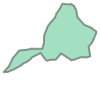

In [25]:
poly = alpha_shape_auto(pts[['Longitude', 'Latitude']].dropna().values)
poly

In [27]:
nyc = gpd.GeoDataFrame({'geometry': [poly]}, crs='+init=epsg:4326')

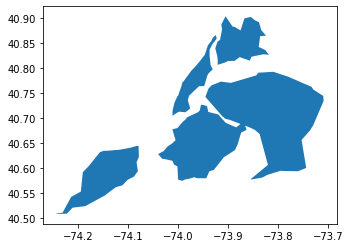

In [28]:
boros = pts.groupby('BoroughCode')\
           [['Longitude', 'Latitude']]\
           .apply(lambda tab: alpha_shape_auto(tab.dropna().values))
boros = gpd.GeoDataFrame({'geometry': boros}, crs='+init=epsg:4326')
boros.plot()

これをkeplerに移す

In [29]:
m2 = KeplerGl()
m2.add_data(data=boros, name='Boroughs')
m2.add_data(data=nyc, name='NYC')
m2

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'Boroughs': {'index': ['K', 'M', 'Q', 'R', 'X'], 'columns': ['geometry'], 'data': [['POLYGON ((…

In [38]:
m3 = KeplerGl()
m3.add_data(data=pts, name='Projects')
m3.add_data(data=boros, name='Boroughs')
m3.add_data(data=nyc, name='NYC')

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


In [37]:
m3

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '6x5j4axj', 'type':…

今回はもともとフラグがあったが、いったんそれを忘れて緯度経度がclosure, K,の内側に入っているか否かを条件にデータを抽出する

In [52]:
print(boros.head())

                                                      geometry
BoroughCode                                                   
K            POLYGON ((-74.03138 40.61804, -74.04005 40.627...
M            POLYGON ((-73.92484 40.86605, -73.92289 40.858...
Q            POLYGON ((-73.76720 40.59378, -73.78618 40.593...
R            POLYGON ((-74.10073 40.57673, -74.10774 40.569...
X            POLYGON ((-73.91620 40.85659, -73.91226 40.877...


In [74]:
from shapely.geometry import Point
collision_points = pts.apply(
    lambda srs: Point(float(srs['Longitude']), float(srs['Latitude'])),
    axis='columns'
)
collision_points

0                            POINT (nan nan)
1                            POINT (nan nan)
2               POINT (-73.839771 40.790638)
3                            POINT (nan nan)
4                            POINT (nan nan)
5               POINT (-74.107737 40.569393)
6               POINT (-73.845091 40.725098)
7               POINT (-73.926597 40.680727)
8       POINT (-73.96876899999999 40.682533)
9       POINT (-73.86603599999999 40.837631)
10              POINT (-73.994404 40.604879)
11              POINT (-73.887512 40.834157)
12      POINT (-73.88480300000001 40.672579)
13              POINT (-73.948368 40.795146)
14              POINT (-73.973292 40.795157)
15      POINT (-74.04004599999999 40.627835)
16       POINT (-73.96655799999999 40.63398)
17              POINT (-73.915263 40.694018)
18              POINT (-73.992953 40.765184)
19      POINT (-74.14631999999999 40.545281)
20              POINT (-74.003404 40.613262)
21              POINT (-73.988297 40.660976)
22        

In [76]:
test = pd.concat([pts, collision_points], axis = 1)
test.head(3)

,School Name,BoroughCode,Geographical District,Project Description,Construction Award,Project type,Building ID,Building Address,City,Postcode,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location 1,0
0,NaN,M,2,NaN,0.0,CAP,M777,227 WEST 27TH STREET,Manhattan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
1,P.S. @ PARCEL F - QUEENS,Q,30,Demo,0.0,CAP,Q375,2ND STREET BETWEEN 56TH AND 57TH AVENUE,Queens,11101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
2,P.S. 129 - QUEENS,Q,25,Addition,0.0,CAP,Q129,128-02 7TH AVENUE,Queens,11356.0,...,40.790638,-73.839771,7.0,19.0,945.0,4096774.0,4.039760e+09,Whitestone,"(40.790638, -73.839771)",POINT (-73.839771 40.790638)


In [118]:
test.columns = ['School Name',           'BoroughCode',
       'Geographical District',   'Project Description',
          'Construction Award',          'Project type',
                 'Building ID',      'Building Address',
                        'City',              'Postcode',
                     'Borough',              'Latitude',
                   'Longitude',       'Community Board',
            'Council District',          'Census Tract',
                         'BIN',                   'BBL',
                         'NTA',            'Location 1',
                             'geometry']

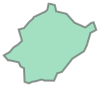

In [117]:
boros['geometry']['K']

In [120]:
test_2 = gpd.GeoDataFrame(test)
test[test_2.within(boros['geometry']['K'])]

,School Name,BoroughCode,Geographical District,Project Description,Construction Award,Project type,Building ID,Building Address,City,Postcode,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location 1,geometry
7,P.S. 21 - BROOKLYN,K,16,LOW VOLTAGE ELECTRICAL SYSTEMS,1037000.00,CIP,K021,180 CHAUNCEY STREET,Brooklyn,11233.0,...,40.680727,-73.926597,3.0,36.0,381.0,3047914.0,3.016920e+09,Crown Heights North ...,"(40.680727, -73.926597)",POINT (-73.92660 40.68073)
8,K753 SPED - BROOKLYN,K,13,LOW VOLTAGE ELECTRICAL SYSTEM/ANSUL SYSTEM,706260.00,CIP,K085,510 CLERMONT AVENUE,Brooklyn,11238.0,...,40.682533,-73.968769,2.0,35.0,179.0,3057521.0,3.020080e+09,Fort Greene ...,"(40.682533, -73.968769)",POINT (-73.96877 40.68253)
10,BKLYN STUDIO SEC. SCL - BROOKL,K,21,EXT MASONRY/ROOFS/WINDOWS,6137000.00,CIP,K721,8310 21ST AVE,Brooklyn,11214.0,...,40.604879,-73.994404,11.0,47.0,288.0,3165232.0,3.063290e+09,Bensonhurst West ...,"(40.604879, -73.994404)",POINT (-73.99440 40.60488)
12,P.S. 158 - BROOKLYN,K,19,ENY AUDITORIUM UPGRADE,227786.00,CIP,K158,400 ASHFORD STREET,Brooklyn,11207.0,...,40.672579,-73.884803,5.0,37.0,1150.0,3089176.0,3.040150e+09,East New York ...,"(40.672579, -73.884803)",POINT (-73.88480 40.67258)
16,P.S. 217 - BROOKLYN,K,22,EXT MASONRY/FLOOD/WINDOWS/PARAPETS,10807450.00,CIP,K217,1100 NEWKIRK AVENUE,Brooklyn,11230.0,...,40.633980,-73.966558,14.0,40.0,526.0,3121072.0,3.052320e+09,Flatbush ...,"(40.63398, -73.966558)",POINT (-73.96656 40.63398)
17,P.S. 377 - BROOKLYN,K,32,FY17 RESO A LIBRARY UPGRADES,349000.00,CIP,K377,200 WOODBINE STREET,Brooklyn,11221.0,...,40.694018,-73.915263,4.0,37.0,415.0,3076784.0,3.033600e+09,Bushwick South ...,"(40.694018, -73.915263)",POINT (-73.91526 40.69402)
20,NEW UTRECHT HS - BROOKLYN,K,20,WATER PENETRATION INTO BASEMENT/NATATORIUM REC...,8803000.00,CIP,K445,1601 80 STREET,Brooklyn,11214.0,...,40.613262,-74.003404,11.0,43.0,182.0,3162711.0,3.062710e+09,Bensonhurst West ...,"(40.613262, -74.003404)",POINT (-74.00340 40.61326)
21,P.S. 295 - BROOKLYN,K,15,GYM & CAFE FLOOR/FLOOD/FLOOR/PARAPETS/MASONRY/...,9114000.00,CIP,K845,330 18 STREET,Brooklyn,11215.0,...,40.660976,-73.988297,7.0,38.0,147.0,3331274.0,3.008800e+09,Sunset Park West ...,"(40.660976, -73.988297)",POINT (-73.98830 40.66098)
22,P.S. 131 - BROOKLYN,K,15,WATER PENETRATION/FLOOD/PARAPETS/ROOFS,12900000.00,CIP,K131,4305 FT HAMILTON PKWY,Brooklyn,11219.0,...,40.641157,-73.993482,12.0,39.0,224.0,3136085.0,3.056030e+09,Borough Park ...,"(40.641157, -73.993482)",POINT (-73.99348 40.64116)
26,P.S. 112 - BROOKLYN,K,20,TCU REMOVAL - PLAYGROUND REDEVELOPMENT,1578914.00,CIP,K112,7115 15 AVENUE,Brooklyn,11228.0,...,40.619780,-74.000792,11.0,43.0,190.0,3157760.0,3.061800e+09,Bensonhurst West ...,"(40.61978, -74.000792)",POINT (-74.00079 40.61978)
